고급회귀분석 과제, CH13

네 번째 과제입니다.

 

제출 기한 12월 8일

 

행렬 계산은 R로 해도 됩니다.

그리고, 계산 후에 R 함수(예:lm)를 이용하여 결과 확인하고, 본인의 풀이가 맞는지 결과 확인해보세요.

 

제출 방법

  - 직접 제출(607호) 도 가능하지만, 

  - 문서 작성 후 pdf로 변환(★★★)하여 lms에 제출을 추천

  (pdf 아닌 문서는 미제출로 간주)

  - ★★★ 파일이름 : 이름(학번)_HW04.pdf 

 

주의사항

- pdf로 꼭 변환하여 제출

- 풀이가 꼭 있어야 함 (답만 적혀 있는 경우 '0'점 처리)

- 부정행위 시 'F'학점 

- 계산은 R로 해도 되지만 계산 풀이 과정이 꼭 있어야 함(수업 시간에 배운 식으로 풀이를 적어야 함.)!!

- lm등의 함수를 이용한 풀이는 정답 확인용으로만 사용.

---

In [1]:
library(ggplot2)

## 1.

|일련번호|$y$(총 소요시간)|$x_1$(적성검사점수)|$x_2$(성별)|학력|
|:---:|:---:|:---:|:---:|:---:|
|1|17|151|남자|대|
|2|26|92|남자|고|
|3|21|175|남자|대|
|4|30|31|남자|고|
|5|22|104|남자|고|
|6|1|277|남자|대학원|
|7|12|210|남자|대학원|
|8|19|120|남자|대|
|9|4|290|남자|대학원|
|10|16|238|남자|대학원|
|11|28|164|여자|대학원|
|12|15|272|여자|대학원|
|13|11|295|여자|대학원|
|14|38|68|여자|고|
|15|31|85|여자|대|
|16|21|224|여자|대학원|
|17|20|166|여자|대|
|18|13|305|여자|대학원|
|19|30|124|여자|대|
|20|14|246|여자|대학원|

In [2]:
df <- data.frame('y'=c(17,26,21,30,22,1,12,19,4,16,28,15,11,38,31,21,20,13,30,14),
           'x1'=c(151,92,175,31,104,277,210,120,290,238,164,272,295,68,85,224,166,305,124,246),
          'x2'=c('남자','남자','남자','남자','남자','남자','남자','남자','남자','남자','여자','여자','여자','여자','여자','여자','여자','여자','여자','여자'),
          'edu'=c('대','고','대','고','고','대학원','대학원','대','대학원','대학원','대학원','대학원','대학원','고','대','대학원','대','대학원','대','대학원'))

### (1)

$x_1$을 $x$로 놓고 각 성별에 대하여 회귀모형을 적합하시오. 그런 후 두 회귀직선의 기울기가 같은지에 대한 가설검정을 하시오(5장 p12 : 두 회귀모형의 검정 참고).

**answer**

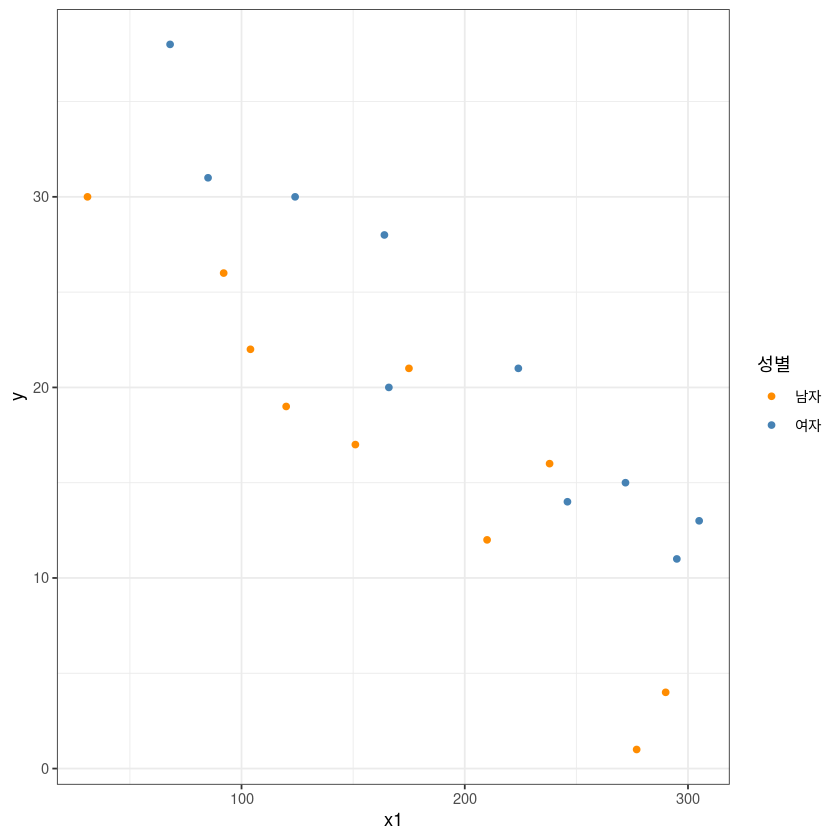

In [3]:
ggplot(df, aes(x1, y, col=x2)) + 
  geom_point() + 
  theme_bw() +
  guides(col=guide_legend(title="성별")) +
  scale_color_manual(labels = c("남자", "여자"), 
                     values = c("darkorange", "steelblue"))

남성, Model 1: $y_i = \beta_{01} + \beta_{11} x_{i1} + \epsilon_i , \epsilon_i \sim i.i.d. N(0, \sigma^2)$

여성, Model 2: $y_i = \beta_{02} + \beta_{12} x_{i2} + \epsilon_i , \epsilon_i \sim i.i.d. N(0, \sigma^2)$

**남자**

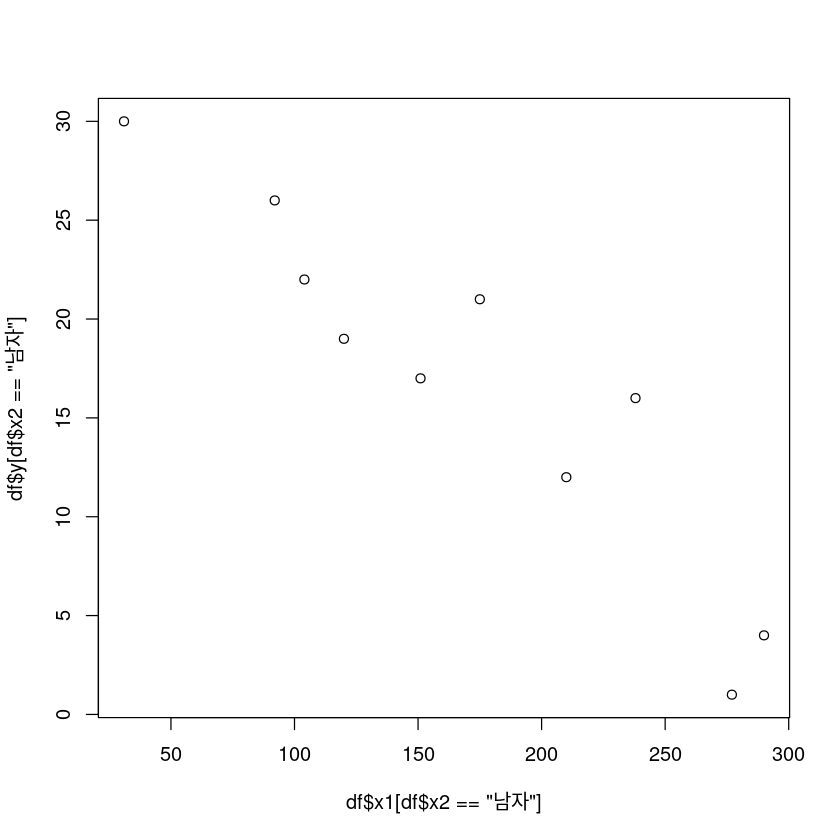

In [4]:
plot(df$x1[df$x2=="남자"], df$y[df$x2=="남자"])

$S_{yy}$

In [5]:
sum((df$y[df$x2=="남자"] - (17+26+21+30+22+1+12+19+4+16)/10)**2)

[1] 745.6

$S_{xx}$

In [6]:
sum((df$x1[df$x2=="남자"] - (151+92+175+31+104+277+210+120+290+238)/10)**2)

[1] 64705.6

$S_{xy}$

In [7]:
sum((df$y[df$x2=="남자"] - (17+26+21+30+22+1+12+19+4+16)/10) * 
    (df$x1[df$x2=="남자"] - (151+92+175+31+104+277+210+120+290+238)/10))

[1] -6461.4

$\hat{\beta}_1 = \frac{S_{xy}}{S_{xx}}$

In [8]:
beta_men <- round(sum((df$y[df$x2=="남자"] - (17+26+21+30+22+1+12+19+4+16)/10) *
    (df$x1[df$x2=="남자"] - (151+92+175+31+104+277+210+120+290+238)/10)) / 
    sum((df$x1[df$x2=="남자"] - (151+92+175+31+104+277+210+120+290+238)/10)**2),5)
beta_men

[1] -0.09986

$\hat{\beta_0}$

In [9]:
round((17+26+21+30+22+1+12+19+4+16)/10 - 
    round(sum((df$y[df$x2=="남자"] - (17+26+21+30+22+1+12+19+4+16)/10) *
    (df$x1[df$x2=="남자"] - (151+92+175+31+104+277+210+120+290+238)/10)) / 
    sum((df$x1[df$x2=="남자"] - (151+92+175+31+104+277+210+120+290+238)/10)**2),5)*
    (151+92+175+31+104+277+210+120+290+238)/10,5)

[1] 33.65637

$\hat{y}_{men} = 33.65637 -0.09986 x_{men}$

---

R code

In [10]:
summary(lm(df$y[df$x2=="남자"]~df$x1[df$x2=="남자"]))


Call:
lm(formula = df$y[df$x2 == "남자"] ~ df$x1[df$x2 == "남자"])

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9953 -1.5008 -0.6915  1.0080  6.1102 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            33.65610    2.60379  12.926 1.21e-06 ***
df$x1[df$x2 == "남자"] -0.09986    0.01393  -7.171 9.51e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.542 on 8 degrees of freedom
Multiple R-squared:  0.8654,	Adjusted R-squared:  0.8485 
F-statistic: 51.43 on 1 and 8 DF,  p-value: 9.51e-05


---

**answer**

$SSE_{men}$

In [11]:
SSE_men <- sum((df$y[df$x2=="남자"] - (33.65637 - 0.09986*df$x1[df$x2=="남자"]))**2)
SSE_men

[1] 100.3747

$MSE_{men} \sim \sigma^2_{men}$

In [12]:
MSE_men <- sum((df$y[df$x2=="남자"] - (33.65637 - 0.09986*df$x1[df$x2=="남자"]))**2)/(10-2)
MSE_men

[1] 12.54684

---

R code

In [13]:
anova(lm(df$y[df$x2=="남자"]~df$x1[df$x2=="남자"]))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
"df$x1[df$x2 == ""남자""]",1,645.2253,645.22530,51.42533,9.509826e-05
Residuals,8,100.3747,12.54684,NA,NA


---

**answer**

**여자**

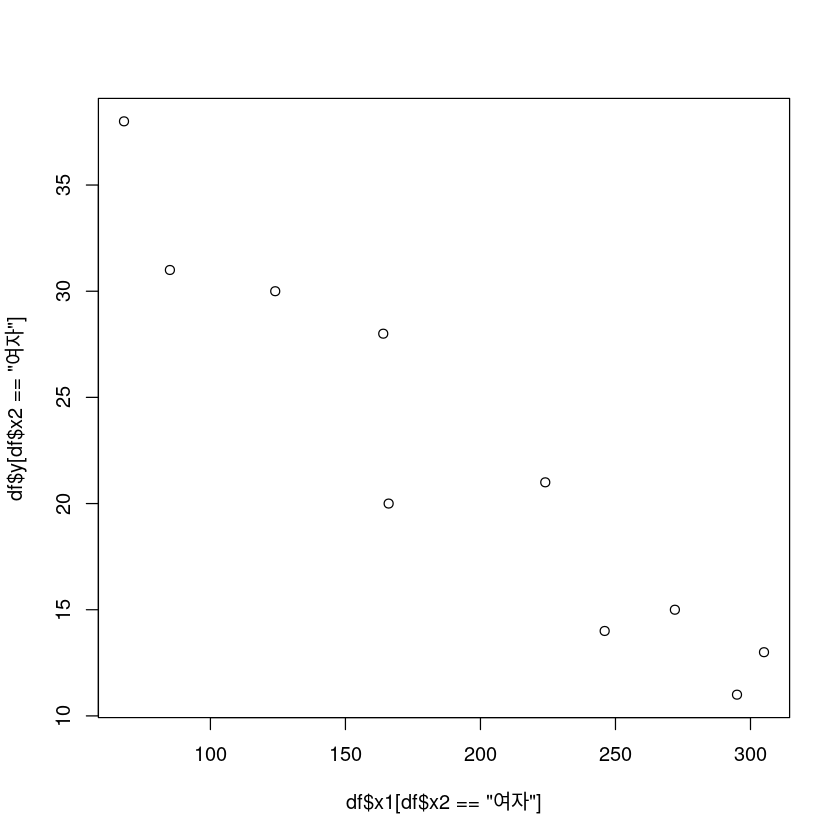

In [14]:
plot(df$x1[df$x2=="여자"], df$y[df$x2=="여자"])

$S_{yy}$

In [15]:
sum((df$y[df$x2=="여자"] - (28+15+11+38+31+21+20+13+30+14)/10)**2)

[1] 756.9

$S_{xx}$

In [16]:
sum((df$x1[df$x2=="여자"] - (164+272+295+68+85+224+166+305+124+246)/10)**2)

[1] 66542.9

$S_{xy}$

In [17]:
sum((df$y[df$x2=="여자"] - (28+15+11+38+31+21+20+13+30+14)/10) * 
    (df$x1[df$x2=="여자"] - (164+272+295+68+85+224+166+305+124+246)/10))

[1] -6783.9

$\hat{\beta}_1 = \frac{S_{xy}}{S_{xx}}$

In [18]:
beta_women <- round(sum((df$y[df$x2=="여자"] - (28+15+11+38+31+21+20+13+30+14)/10) * 
    (df$x1[df$x2=="여자"] - (164+272+295+68+85+224+166+305+124+246)/10))/
      sum((df$x1[df$x2=="여자"] - (164+272+295+68+85+224+166+305+124+246)/10)**2),5)
beta_women

[1] -0.10195

$\hat{\beta_0}$

In [19]:
round((28+15+11+38+31+21+20+13+30+14)/10 - 
      round(sum((df$y[df$x2=="여자"] - (28+15+11+38+31+21+20+13+30+14)/10) * 
    (df$x1[df$x2=="여자"] - (164+272+295+68+85+224+166+305+124+246)/10))/
      sum((df$x1[df$x2=="여자"] - (164+272+295+68+85+224+166+305+124+246)/10)**2),5)*
      (164+272+295+68+85+224+166+305+124+246)/10,5)

[1] 41.97006

$\hat{y}_{women} = 41.97006 -0.10195 x_{women}$

---

R code

In [20]:
summary(lm(df$y[df$x2=="여자"]~df$x1[df$x2=="여자"]))


Call:
lm(formula = df$y[df$x2 == "여자"] ~ df$x1[df$x2 == "여자"])

Residuals:
   Min     1Q Median     3Q    Max 
-5.046 -1.952  0.716  2.060  2.963 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            41.96962    2.33998  17.936 9.57e-08 ***
df$x1[df$x2 == "여자"] -0.10195    0.01108  -9.205 1.57e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.857 on 8 degrees of freedom
Multiple R-squared:  0.9137,	Adjusted R-squared:  0.9029 
F-statistic: 84.73 on 1 and 8 DF,  p-value: 1.57e-05


---

**answer**

$SSE_{women}$

In [21]:
SSE_women <- sum((df$y[df$x2=="여자"] - (41.97006 - 0.10195*df$x1[df$x2=="여자"]))**2)
SSE_women

[1] 65.29655

$MSE_{women} \sim \sigma^2_{women}$

In [22]:
MSE_women <- sum((df$y[df$x2=="여자"] - (41.97006 - 0.10195*df$x1[df$x2=="여자"]))**2)/(10-2)
MSE_women

[1] 8.162069

---

R code

In [23]:
anova(lm(df$y[df$x2=="여자"]~df$x1[df$x2=="여자"]))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
"df$x1[df$x2 == ""여자""]",1,691.60345,691.603450,84.73384,1.56975e-05
Residuals,8,65.29655,8.162069,NA,NA


---

**answer**

가설

$H_0: \beta_{11} - \beta_{12} = 0$

$H_0: \beta_{11} - \beta_{12} \neq 0$

검정통계량 $t_0 = \frac{\hat{\beta}_{11}- \hat{\beta}_{12}}{\sqrt{\hat{var}(\hat{\beta}_{11} - \hat{\beta}_{12})}}\sim H_0, t(n_1 - n_2 - 4)$

$var(\hat{\beta}_{11} - \hat{\beta}_{12})$

$= var(\hat{\beta}_{11}) + var(\hat{\beta}_{12})$

$= \frac{\sigma^2}{\sum(x_{11} - \bar{x}_{11})^2} + \frac{\sigma^2}{\sum(x_{12} - \bar{x}_{12})^2}$

$\hat{\beta}_{11} - \hat{\beta}_{12}$

In [24]:
beta_men # CH13, p14 beta_1과 동일
beta_women # CH13 p1.4 beta1 + beta3 과 동일
# beta11 - beta12 = \beta3 = 0.0021

[1] -0.09986

[1] -0.10195

In [25]:
beta_men - beta_women

[1] 0.00209

$\sigma^2 = MSE(FM) = \frac{SSE_{FM}}{n_1 + n_2 - 1}$

$\star SSE_{FM} = SSE_1 + SSE_2$

In [26]:
SSE_men
SSE_women
SSE_men + SSE_women # SSE_FM
(SSE_men + SSE_women)/(10 +10-2)

[1] 100.3747

[1] 65.29655

[1] 165.6713

[1] 9.203959

$\sqrt{var(\hat{\beta}_{11} - \hat{\beta}_{12}))}$

In [27]:
sqrt(MSE_men/sum((df$x1[df$x2=="남자"] - (151+92+175+31+104+277+210+120+290+238)/10)**2) + 
    MSE_women/sum((df$x1[df$x2=="여자"] - (164+272+295+68+85+224+166+305+124+246)/10)**2))
# CG13 p,16 hat{=(s.e.)(beta_3)과 동일

[1] 0.01779228

$t_0$

In [28]:
(beta_men - beta_women)/ 
    sqrt(MSE_men/sum((df$x1[df$x2=="남자"] - (151+92+175+31+104+277+210+120+290+238)/10)**2) + 
    MSE_women/sum((df$x1[df$x2=="여자"] - (164+272+295+68+85+224+166+305+124+246)/10)**2))

[1] 0.1174667

$var(\hat{\beta}_{men} - \hat{\beta}_{women})$

In [29]:
MSE_men/sum((df$x1[df$x2=="남자"] - (151+92+175+31+104+277+210+120+290+238)/10)**2) + 
    MSE_women/sum((df$x1[df$x2=="여자"] - (164+272+295+68+85+224+166+305+124+246)/10)**2)

[1] 0.0003165653

In [30]:
qt(0.025,16)

[1] -2.119905

기각역 : $|t_0| > t_{\alpha/2}(n_1 + n_2 - 4) = 2.120$

결론: 기각역에 속하지 않으므로 귀무가설 기각 못함.

$H_0: \beta_{11} - \beta_{12} = 0$ 채택

따라서 성별간 두 기울기가 다르다고 할 수 없다.

---

R code

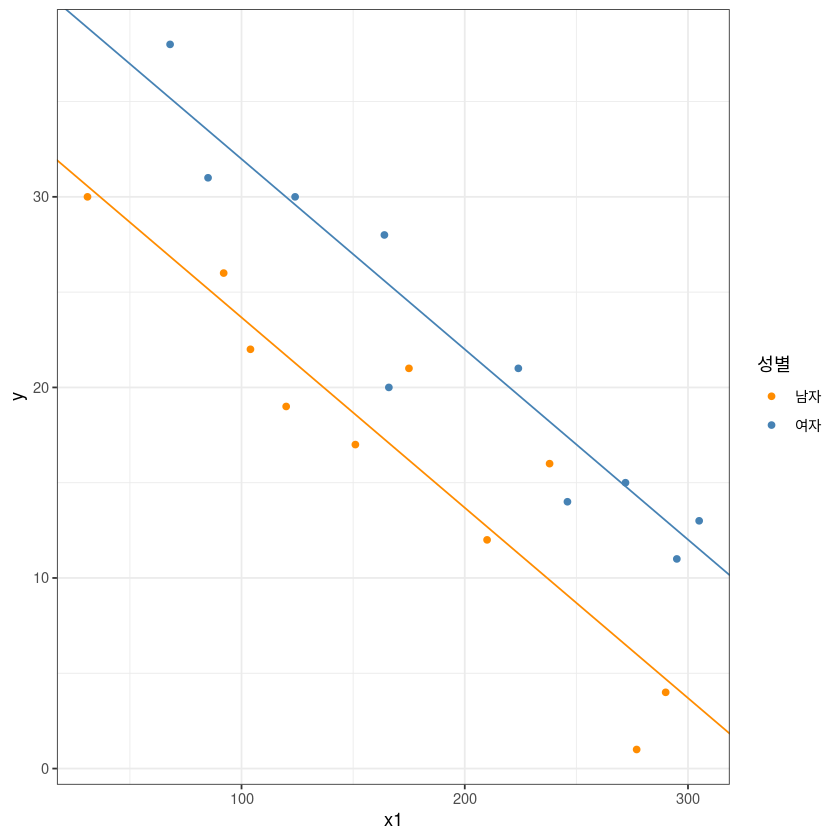

In [31]:
ggplot(df, aes(x1, y, col=x2)) + 
  geom_point() + 
  theme_bw() + 
  geom_abline(slope = coef(lm(df$y~df$x1*df$x2))[2], intercept = coef(lm(df$y~df$x1*df$x2))[1], col= 'darkorange')+
  geom_abline(slope = coef(lm(df$y~df$x1*df$x2))[2], intercept = coef(lm(df$y~df$x1*df$x2))[1]+coef(lm(df$y~df$x1*df$x2))[3], col= 'steelblue')+
  guides(col=guide_legend(title="성별")) +
  scale_color_manual(labels = c("남자", "여자"), values = c("darkorange", "steelblue"))

In [32]:
summary(lm(df$y~df$x1*df$x2))


Call:
lm(formula = df$y ~ df$x1 * df$x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0463 -1.7591 -0.6232  1.9311  6.1102 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     33.656104   2.365392  14.229 1.68e-10 ***
df$x1           -0.099858   0.012650  -7.894 6.59e-07 ***
df$x2여자        8.313516   3.541379   2.348   0.0321 *  
df$x1:df$x2여자 -0.002089   0.017766  -0.118   0.9078    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.218 on 16 degrees of freedom
Multiple R-squared:  0.8992,	Adjusted R-squared:  0.8803 
F-statistic: 47.56 on 3 and 16 DF,  p-value: 3.405e-08


$\beta_3 = -0.002089$, 유의확률 $0.9078 $ 유의수준 $\alpha=0.05$에서 기각할 수 없다.

기각역: $|t_0|?t_{\alpha/2}(n_1 + n_2 - 4) = t_{0.025}(16) = 2.120$

기각역에 속하지 않으므로 $H_0$ 기각 못함 $H_0: \beta_{11} - \beta_{12} = 0$ 채택

따라서 성별간 두 기울기가 다르다고 할 수 없다.

### (2)

13장 강의노트 p.8 에 따르면 $x_1,x_2$을 설명변수로 했을 때 적합 결과는
$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2$$
$$= 33.8349 − 0.1009x_1 + 7.9340x_2$$
이었다. $\beta_1$ 의 추정값 $\hat{\beta}_1$ 이 갖는 분산을 추정하고, $\beta_1$ 의 95% 신뢰구간을 구하시오.

**answer**

In [33]:
betahat_2 <- solve(t(matrix(c(rep(1,20),df$x1,rep(0,10),rep(1,10)),nrow=20,ncol=3))%*%
      matrix(c(rep(1,20),df$x1,rep(0,10),rep(1,10)),nrow=20,ncol=3))%*%
        t(matrix(c(rep(1,20),df$x1,rep(0,10),rep(1,10)),nrow=20,ncol=3))%*%
        matrix(df$y,nrow=20,ncol=1)
betahat_2

33.8349119
-0.1009177
7.9339526


In [34]:
df$sex <- ifelse(df$x2=='여자',1,0)

$var(\beta_1) = (x^\top x)^{-1}_{(2,2)} \sigma^2$

In [35]:
t(matrix(c(rep(1,20),df$x1,df$sex),nrow=20,ncol=3))%*%matrix(c(rep(1,20),df$x1,df$sex),nrow=20,ncol=3)

20,3637,10
3637,796043,1949
10,1949,10


In [36]:
solve(t(matrix(c(rep(1,20),df$x1,df$sex),nrow=20,ncol=3))%*%matrix(c(rep(1,20),df$x1,df$sex),nrow=20,ncol=3))

0.31709536,-1.286110e-03,-0.0664325307
-0.00128611,7.619135e-06,-0.0001988594
-0.06643253,-1.988594e-04,0.2051902307


$(x^\top x)^{-1}_{(2,2)}$

In [37]:
solve(t(matrix(c(rep(1,20),df$x1,df$sex),nrow=20,ncol=3))%*%matrix(c(rep(1,20),df$x1,df$sex),nrow=20,ncol=3))[2,2]

[1] 7.619135e-06

$MSE \sim \sigma^2$

In [38]:
sum((matrix(c(rep(1,20),df$x1,rep(0,10),rep(1,10)),nrow=20,ncol=3)%*%betahat_2 - df$y)**2)/17

[1] 9.753792

$var(\beta_1) = (x^\top x)^{-1}_{(2,2)} \sigma^2$

In [39]:
hat_var_b1 <- ((solve(t(matrix(c(rep(1,20),df$x1,rep(0,10),rep(1,10)),nrow=20,ncol=3)) %*% matrix(c(rep(1,20),df$x1,rep(0,10),rep(1,10)),nrow=20,ncol=3)))[2,2])*
    sum((matrix(c(rep(1,20),df$x1,rep(0,10),rep(1,10)),nrow=20,ncol=3)%*%betahat_2 - df$y)**2)/17
hat_var_b1

[1] 7.431545e-05

In [40]:
sqrt(hat_var_b1)

[1] 0.008620641

$\beta_1 \pm t_{0.975}(17) se(\hat{\beta}_1)$

In [41]:
betahat_2[2] - qt(0.975,17) * sqrt(hat_var_b1)

[1] -0.1191057

In [42]:
betahat_2[2] + qt(0.975,17) * sqrt(hat_var_b1)

[1] -0.08272976

---

R code

In [43]:
summary(lm(df$y~matrix(c(rep(1,20),df$x1,df$sex),nrow=20,ncol=3)))$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),33.8349119,1.758659173,19.239039,5.635999e-13
"matrix(c(rep(1, 20), df$x1, df$sex), nrow = 20, ncol = 3)2",-0.1009177,0.008620641,-11.706522,1.468240e-09
"matrix(c(rep(1, 20), df$x1, df$sex), nrow = 20, ncol = 3)3",7.9339526,1.414702366,5.608213,3.134533e-05


In [44]:
anova(lm(df$y~matrix(c(rep(1,20),df$x1,df$sex),nrow=20,ncol=3)))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
"matrix(c(rep(1, 20), df$x1, df$sex), nrow = 20, ncol = 3)",2,1477.1355,738.567770,75.72109,3.419664e-09
Residuals,17,165.8145,9.753792,NA,NA


In [45]:
confint(lm(df$y~matrix(c(rep(1,20),df$x1,rep(0,10),rep(1,10)),nrow=20,ncol=3)), level=0.95)

,2.5 %,97.5 %
(Intercept),30.1244654,37.54535846
"matrix(c(rep(1, 20), df$x1, rep(0, 10), rep(1, 10)), nrow = 20, ncol = 3)1",NA,NA
"matrix(c(rep(1, 20), df$x1, rep(0, 10), rep(1, 10)), nrow = 20, ncol = 3)2",-0.1191057,-0.08272976
"matrix(c(rep(1, 20), df$x1, rep(0, 10), rep(1, 10)), nrow = 20, ncol = 3)3",4.9491915,10.91871371


### (3)

다음의 모형을 적합하시오.
$$y_i =\beta_0 +\beta_1x_{1i} +\beta_2x_{2i} +\beta_3x_{3i} +\beta_4x_{4i} + \epsilon_i$$

$$x_{3i}=\begin{cases} 1: & \text{학력이 고졸} \\ 0 : &\text{기타} \end{cases}, x_{4i}= \begin{cases} 1 : & \text{학력이 대졸} \\ 0 : & \text{기타}\end{cases} $$

**answer**

In [46]:
df$high <- ifelse(df$edu=='고',1,0)

In [47]:
df$univ <- ifelse(df$edu=='대',1,0)

$\hat{\beta}$

In [48]:
x_hu <- matrix(c(rep(c(1),20),df$x1,df$sex,df$high,df$univ),nrow=20,ncol=5)

In [49]:
betahat_hu <- solve(t(x_hu)%*%x_hu)%*%t(x_hu)%*%df$y
betahat_hu

36.5226684
-0.1101234
7.8990531
-1.3758336
-2.4036479


$y = 36.5226684 - 0.1101234 x_1 + 7.8990531 x_2 - 1.3758336 x_3 - 2.4036479 x_4$

----

R code

In [50]:
summary(lm(y~x1+sex+high+univ,df))


Call:
lm(formula = y ~ x1 + sex + high + univ, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0185 -1.7038 -0.5386  1.6375  6.1526 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.52267    5.33138   6.851 5.50e-06 ***
x1          -0.11012    0.01997  -5.516 5.93e-05 ***
sex          7.89905    1.50447   5.250 9.79e-05 ***
high        -1.37583    4.13333  -0.333    0.744    
univ        -2.40365    2.85796  -0.841    0.414    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.214 on 15 degrees of freedom
Multiple R-squared:  0.9057,	Adjusted R-squared:  0.8806 
F-statistic: 36.02 on 4 and 15 DF,  p-value: 1.587e-07


---

### (4)

위의 모형에서 $\beta_3$과 $\beta_4$가 갖는 의미를 해석하시오.

$$y_i =\beta_0 +\beta_1x_{1i} +\beta_2x_{2i} +\beta_3x_{3i} +\beta_4x_{4i} + \epsilon_i$$

$$x_{3i}=\begin{cases} 1: & \text{학력이 고졸} \\ 0 : &\text{기타} \end{cases}, x_{4i}= \begin{cases} 1 : & \text{학력이 대졸} \\ 0 : & \text{기타}\end{cases} $$

**answer**

$E(y) = \beta_0 +\beta_1x_{1} +\beta_2x_{2} +\beta_3x_{3} +\beta_4x_{4}$

학력이 고등학교 졸업

$E(y|고) = (\beta_0 +\beta_3) +\beta_1x_{1} +\beta_2x_{2}$

학력이 대학교 졸업

$E(y|고) = (\beta_0 +\beta_4)+\beta_1x_{1}+\beta_2x_{2}$

학력이 대학원 졸업

$E(y|대학원) = \beta_0 +\beta_1x_{1}+\beta_2x_{2}$

$\beta_3$ = 학력이 고등학교 졸업일때의 평균 숙련 시간에서 학력이 대학원 졸업일때의 평균 숙련시간을 뺀 값이다.

$\beta_4$ = 학력이 대학교 졸업일때의 평균 숙련 시간에서 학력이 대학원 졸업일때의 평균 숙련시간을 뺀 값이다.

### (5)

위의 $\beta_3$과 $\beta_4$의 최소제곱추정값 $\hat{\beta}_3$과 \$\hat{\beta}_4$가 갖는 각각의 분산을 추정하시오. $\beta_3$과 $\beta_4$의 95% 신뢰구간을 구하시오

**answer**

$var(\beta_3) = (x^\top x)^{-1}_{(4,4)} \sigma^2$

In [51]:
t(x_hu)%*%x_hu

20,3637,10,4,6
3637,796043,1949,295,821
10,1949,10,1,3
4,295,1,4,0
6,821,3,0,6


In [52]:
solve(t(x_hu)%*%x_hu)

2.751920464,-0.009968093,-0.231607148,-1.958871839,-1.272149536
-0.009968093,0.000038595,0.000397155,0.007022423,0.004488433
-0.231607148,0.000397155,0.219140617,0.147531812,0.067692796
-1.958871839,0.007022423,0.147531812,1.654085215,0.924204433
-1.272149536,0.004488433,0.067692796,0.924204433,0.790802611


$(x^\top x)^{-1}_{(4,4)}$

In [53]:
solve(t(x_hu)%*%x_hu)[4,4]

[1] 1.654085

$MSE \sim \sigma^2$

In [54]:
sum((x_hu%*%betahat_hu - df$y)**2)

[1] 154.9295

In [55]:
sum((x_hu%*%betahat_hu - df$y)**2)/15

[1] 10.32863

$var(\hat{\beta}_3) = (x^\top x)^{-1}_{(4,4)} \sigma^2$

In [56]:
hat_var_hu_b3 <- (solve(t(x_hu)%*%x_hu)[4,4]%*% sum((x_hu%*%betahat_hu - df$y)**2)/15)[,]
hat_var_hu_b3

[1] 17.08443

In [57]:
sqrt(hat_var_hu_b3)

[1] 4.133332

$t_{\alpha/2}(n-4-1)$

In [58]:
qt(0.975,15)

[1] 2.13145

$\beta_3 \pm t_{0.975}(15) se(\hat{\beta}_3)$

In [59]:
betahat_hu[4] - qt(0.975,15) * sqrt(hat_var_hu_b3)

[1] -10.18582

In [60]:
betahat_hu[4] + qt(0.975,15) * sqrt(hat_var_hu_b3)

[1] 7.434155

$(x^\top x)^{-1}_{(5,5)}$

In [61]:
solve(t(x_hu)%*%x_hu)[5,5]

[1] 0.7908026

$MSE \sim \sigma^2$

In [62]:
sum((x_hu%*%betahat_hu - df$y)**2)/15

[1] 10.32863

$var(\beta_4) = (x^\top x)^{-1}_{(5,5)} \sigma^2$

In [63]:
hat_var_hu_b4 <- (solve(t(x_hu)%*%x_hu)[5,5]%*% sum((x_hu%*%betahat_hu - df$y)**2)/15)[,]
hat_var_hu_b4

[1] 8.167908

In [64]:
sqrt(hat_var_hu_b4)

[1] 2.857955

$\beta_4 \pm t_{0.975}(15) se(\hat{\beta}_4)$

In [65]:
betahat_hu[5] - qt(0.975,15) * sqrt(hat_var_hu_b4)

[1] -8.495235

In [66]:
betahat_hu[5] + qt(0.975,15) * sqrt(hat_var_hu_b4)

[1] 3.687939

---

R code

In [67]:
summary(lm(df$y~x_hu))$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),36.5226684,5.33137589,6.8505146,5.501546e-06
x_hu2,-0.1101234,0.01996581,-5.5155977,5.929593e-05
x_hu3,7.8990531,1.50446748,5.2503980,9.786601e-05
x_hu4,-1.3758336,4.13333214,-0.3328631,7.438444e-01
x_hu5,-2.4036479,2.85795517,-0.8410376,4.135338e-01


In [68]:
anova(lm(df$y~x_hu))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x_hu,4,1488.0205,372.00514,36.01689,1.586767e-07
Residuals,15,154.9295,10.32863,NA,NA


In [69]:
confint(lm(df$y~x_hu), level=0.95)

,2.5 %,97.5 %
(Intercept),25.1591097,47.88622717
x_hu1,NA,NA
x_hu2,-0.1526795,-0.06756725
x_hu3,4.6923566,11.10574964
x_hu4,-10.1858225,7.43415535
x_hu5,-8.4952351,3.68793936


### (6)

만약 적성검사점수와 성별, 적성검사점수와 학력, 성별과 학력간에 교호작용이 있다면, 다음의 반응함수를 가정할 수 있다.
$$E(y)=\beta_0 +\beta_1x_1 +\beta_2x_2 +\beta_3x_3 +\beta_4x_4$$
$$+ \beta_5x_1x_2 + \beta_6x_1x_3 + \beta_7x_1x_4 + \beta_8x_2x_3 + \beta_9x_2x_4$$
데이터로부터 위의 반응함수를 적합하고, 다섯 개의 다음 가설을 유의수준 $\alpha = 0.1$에서 검정하시오. $H_0 :\beta_i =0, H_1 :\beta_i  \neq 0(i=5,6,7,8,9)$

**answer**

In [70]:
x_6 <- matrix(c(rep(c(1),20),df$x1,df$sex,df$high,df$univ,
                df$x1*df$sex, df$x1*df$high, df$x1*df$univ, df$sex*df$high, df$sex*df$univ),nrow=20,ncol=10)

In [71]:
x_6

1,151,0,0,1,0,0,151,0,0
1,92,0,1,0,0,92,0,0,0
1,175,0,0,1,0,0,175,0,0
1,31,0,1,0,0,31,0,0,0
1,104,0,1,0,0,104,0,0,0
1,277,0,0,0,0,0,0,0,0
1,210,0,0,0,0,0,0,0,0
1,120,0,0,1,0,0,120,0,0
1,290,0,0,0,0,0,0,0,0
1,238,0,0,0,0,0,0,0,0
1,164,1,0,0,164,0,0,0,0


In [72]:
betahat_6 <- solve(t(x_6)%*%x_6)%*%t(x_6)%*%df$y
betahat_6

36.63696518
-0.11186981
12.27994350
-3.42748073
-6.74634061
-0.01528919
0.01659028
0.03861449
0.02924469
-4.10250464


$\hat{E}(y) = 36.63696518 - 0.11186981x_1 + 12.27994350x_2 - 3.42748073x_3 - 6.74634061x_4 - 0.01528919x_1 x_2 + 0.01659028x_1 x_3 + 0.03861449 x_1 x_4 + 0.02924469x_2 x_3 - 4.10250464x_2 x_4$

In [73]:
t(x_6)%*%x_6

20,3637,10,4,6,1949,295,821,1,3
3637,796043,1949,295,821,446403,24865,117983,68,375
10,1949,10,1,3,1949,68,375,1,3
4,295,1,4,0,68,295,0,1,0
6,821,3,0,6,375,0,821,0,3
1949,446403,1949,68,375,446403,4624,50157,68,375
295,24865,68,295,0,4624,24865,0,68,0
821,117983,375,0,821,50157,0,117983,0,375
1,68,1,1,0,68,68,0,1,0
3,375,3,0,3,375,0,375,0,3


In [74]:
solve(t(x_6)%*%x_6)

13.17371289,-5.093089e-02,-12.267241674,-13.17371289,-8.36632222,4.731945e-02,5.093089e-02,1.859418e-02,9.049519133,5.587008431
-0.05093089,2.007129e-04,0.047358588,0.05093089,0.03198551,-1.864806e-04,-2.007129e-04,-7.327756e-05,-0.034677908,-0.021032546
-12.26724167,4.735859e-02,15.889907134,12.26724167,6.05702973,-6.112751e-02,-4.735859e-02,-5.585862e-03,-11.733236632,-7.260347528
-13.17371289,5.093089e-02,12.267241674,15.37525737,8.36632222,-4.731945e-02,-7.562090e-02,-1.859418e-02,-9.572142583,-5.587008431
-8.36632222,3.198551e-02,6.057029727,8.36632222,10.98679372,-2.278514e-02,-3.198551e-02,-4.736984e-02,-4.507640358,-3.906316822
0.04731945,-1.864806e-04,-0.061127507,-0.04731945,-0.02278514,2.414928e-04,1.864806e-04,2.145159e-05,0.044705999,0.027035225
0.05093089,-2.007129e-04,-0.047358588,-0.07562090,-0.03198551,1.864806e-04,5.270126e-04,7.327756e-05,0.037179539,0.021032546
0.01859418,-7.327756e-05,-0.005585862,-0.01859418,-0.04736984,2.145159e-05,7.327756e-05,2.668358e-04,0.004127154,0.007485293
9.04951913,-3.467791e-02,-11.733236632,-9.57214258,-4.50764036,4.470600e-02,3.717954e-02,4.127154e-03,10.045741217,5.421952259
5.58700843,-2.103255e-02,-7.260347528,-5.58700843,-3.90631682,2.703522e-02,2.103255e-02,7.485293e-03,5.421952259,4.226992806


$MSE \sim \sigma^2$

In [75]:
sum((x_6%*%betahat_6 - df$y)**2)

[1] 128.6049

In [76]:
sum((x_6%*%betahat_6 - df$y)**2)/10

[1] 12.86049

$H_0: \beta_1 = 0 \text{ vs } H_1: \beta_i \neq 0 (i=5,6,7,8,9)$

$t_0 = \frac{\hat{\beta}_i}{\hat{s.e.}(\hat{\beta}_i)}\sim H_0 , t(n-p-1)$

---

 $H_0 :\beta_5 =0$
 
 $H_1 :\beta_5  \neq 0$

$(x^\top x)^{-1}_{(6,6)}$

In [77]:
solve(t(x_6)%*%x_6)[6,6]

[1] 0.0002414928

$var(\hat{\beta}_5) = (x^\top x)^{-1}_{(6,6)} \sigma^2$

In [78]:
hat_var_6_b5 <- (solve(t(x_6)%*%x_6)[6,6]*sum((x_6%*%betahat_6 - df$y)**2)/10)
hat_var_6_b5

[1] 0.003105716

In [79]:
sqrt(hat_var_6_b5)

[1] 0.05572895

$t_0 = \frac{\beta_5}{\sqrt{\hat{var}(\hat{\beta}_5)}}$

In [80]:
betahat_6[6]/sqrt(hat_var_6_b5)

[1] -0.2743491

In [81]:
qt(0.95,10)

[1] 1.812461

$|t_0|<1.812$가 되어 귀무가설 $H_0 :\beta_5 =0$은 기각할 수 없다.

---

 $H_0 :\beta_6 =0$
 
 $H_1 :\beta_6  \neq 0$

$(x^\top x)^{-1}_{(7,7)}$

In [82]:
solve(t(x_6)%*%x_6)[7,7]

[1] 0.0005270126

$var(\beta_6) = (x^\top x)^{-1}_{(7,7)} \sigma^2$

In [83]:
hat_var_6_b6 <- (solve(t(x_6)%*%x_6)[7,7]*sum((x_6%*%betahat_6 - df$y)**2)/10)
hat_var_6_b6

[1] 0.006777641

$t_0 = \frac{\beta_6}{\sqrt{\hat{var}(\hat{\beta}_6)}}$

In [84]:
betahat_6[7]/sqrt(hat_var_6_b6)

[1] 0.2015183

In [85]:
qt(0.95,10)

[1] 1.812461

$|t_0|<1.812$가 되어 귀무가설 $H_0 :\beta_6 =0$은 기각할 수 없다.

---

 $H_0 :\beta_7 =0$
 
 $H_1 :\beta_7  \neq 0$

$(x^\top x)^{-1}_{(8,8)}$

In [86]:
solve(t(x_6)%*%x_6)[8,8]

[1] 0.0002668358

$var(\beta_7) = (x^\top x)^{-1}_{(8,8)} \sigma^2$

In [87]:
hat_var_6_b7 <- (solve(t(x_6)%*%x_6)[8,8]*sum((x_6%*%betahat_6 - df$y)**2)/10)
hat_var_6_b7

[1] 0.00343164

$t_0 = \frac{\beta_7}{\sqrt{\hat{var}(\hat{\beta}_7)}}$

In [88]:
betahat_6[8]

[1] 0.03861449

In [89]:
betahat_6[8]/sqrt(hat_var_6_b7)

[1] 0.6591731

In [90]:
qt(0.95,10)

[1] 1.812461

$|t_0|<1.812$가 되어 귀무가설 $H_0 :\beta_7 =0$은 기각할 수 없다.

---

 $H_0 :\beta_8 =0$
 
 $H_1 :\beta_8  \neq 0$

$(x^\top x)^{-1}_{(9,9)}$

In [91]:
solve(t(x_6)%*%x_6)[9,9]

[1] 10.04574

$var(\beta_8) = (x^\top x)^{-1}_{(9,9)} \sigma^2$

In [92]:
hat_var_6_b8 <- (solve(t(x_6)%*%x_6)[9,9]*sum((x_6%*%betahat_6 - df$y)**2)/10)
hat_var_6_b8

[1] 129.1932

$t_0 = \frac{\beta_8}{\sqrt{\hat{var}(\hat{\beta}_8)}}$

In [93]:
betahat_6[9]/sqrt(hat_var_6_b8)

[1] 0.002572926

In [94]:
qt(0.95,10)

[1] 1.812461

$|t_0|<1.812$가 되어 귀무가설 $H_0 :\beta_8 =0$은 기각할 수 없다.

---

 $H_0 :\beta_9 =0$
 
 $H_1 :\beta_9  \neq 0$

$t_0 = \frac{\beta_9}{\sqrt{\hat{var}(\hat{\beta}_9)}}$

$(x^\top x)^{-1}_{(10,10)}$

In [95]:
solve(t(x_6)%*%x_6)[10,10]

[1] 4.226993

$var(\beta_{10}) = (x^\top x)^{-1}_{(10,10)} \sigma^2$

In [96]:
hat_var_6_b9 <- (solve(t(x_6)%*%x_6)[10,10]*sum((x_6%*%betahat_6 - df$y)**2)/10)
hat_var_6_b9

[1] 54.3612

In [97]:
betahat_6[10]/sqrt(hat_var_6_b9)

[1] -0.5564223

In [98]:
qt(0.95,10)

[1] 1.812461

$|t_0|<1.812$가 되어 귀무가설 $H_0 :\beta_9 =0$은 기각할 수 없다.

---

R code

In [99]:
summary(lm(y ~ x1 + sex + high + univ + x1*sex + x1*high + x1*univ + sex*high + sex*univ,df))


Call:
lm(formula = y ~ x1 + sex + high + univ + x1 * sex + x1 * high + 
    x1 * univ + sex * high + sex * univ, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6490 -1.4326 -0.1288  0.8918  5.9881 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 36.63697   13.01616   2.815   0.0183 *
x1          -0.11187    0.05081  -2.202   0.0523 .
sex         12.27994   14.29517   0.859   0.4104  
high        -3.42748   14.06177  -0.244   0.8124  
univ        -6.74634   11.88678  -0.568   0.5829  
x1:sex      -0.01529    0.05573  -0.274   0.7894  
x1:high      0.01659    0.08233   0.202   0.8443  
x1:univ      0.03861    0.05858   0.659   0.5247  
sex:high     0.02924   11.36632   0.003   0.9980  
sex:univ    -4.10250    7.37300  -0.556   0.5902  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.586 on 10 degrees of freedom
Multiple R-squared:  0.9217,	Adjusted R-squared:  0.8513 
F-statistic: 13.08 on 9

In [100]:
anova(lm(y ~ x1 + sex + high + univ + x1*sex + x1*high + x1*univ + sex*high + sex*univ,df))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x1,1,1170.3587315,1170.3587315,91.00420328,2.444210e-06
sex,1,306.7768085,306.7768085,23.85420666,6.380709e-04
high,1,3.5791086,3.5791086,0.27830264,6.093205e-01
univ,1,7.3058980,7.3058980,0.56808857,4.683946e-01
x1:sex,1,0.6267948,0.6267948,0.04873802,8.297162e-01
x1:high,1,0.1408619,0.1408619,0.01095307,9.187174e-01
x1:univ,1,12.5166525,12.5166525,0.97326398,3.471356e-01
sex:high,1,9.0585522,9.0585522,0.70437063,4.209294e-01
sex:univ,1,3.9816828,3.9816828,0.30960581,5.901555e-01


### (7)

위의 반응함수에 대하여 회귀분석을 통한 분산분석표를 작성하고, 회귀변동의 유의성을 $F$-검정하시오. 이때 $F$ -검정의 귀무가설을 $\beta_i$ 들로 표현하시오.

**answer**

$SST$

In [101]:
SST <- sum((df$y - (17+26+21+30+22+1+12+19+4+16+28+15+11+38+31+21+20+13+30+14)/20)**2)
SST

[1] 1642.95

$SSR$

In [102]:
SSR_7 <- sum(((17+26+21+30+22+1+12+19+4+16+28+15+11+38+31+21+20+13+30+14)/20 - x_6%*%betahat_6)**2)
SSR_7

[1] 1514.345

$MSR$

In [103]:
MSR_7 <- SSR_7/9
MSR_7

[1] 168.2606

$SSE$

In [104]:
SSE_7 <- SST - SSR_7
SSE_7

[1] 128.6049

$MSE$

In [105]:
MSE_7 <- SSE_7/10
MSE_7

[1] 12.86049

$F_0$

In [106]:
F0_7 <- MSR_7 / MSE_7
F0_7

[1] 13.08353

In [107]:
qf(0.95,9,10)

[1] 3.020383

||제곱합|자유도|평균제곱합|F_0|F_{0.05}(9,10)|
|:--:|:--:|:--:|:--:|:--:|:--:|
|회귀|1514.35|9|168.26|13.084|3.0204|
|잔차|128.6|10|12.86|||
|합계|1642.95|19||||

$H_0 : \beta_1 = \beta_2 = \beta_3 = \beta_4 = \beta_5 = \beta_6 = \beta_7 = \beta_8 = \beta_9 = 0$

$H_1 : \text{not } H_0$

$|F_0|>3.0204$가 되어 귀무가설 $H_0 : \beta_1 = \beta_2 = \beta_3 = \beta_4 = \beta_5 = \beta_6 = \beta_7 = \beta_8 = \beta_9 = 0$은 기각한다.

따라서 유의수준 0.05에서 회귀모형이 유의함을 알 수 있다.

---

R code

In [108]:
round(anova(lm(y ~ x1 + sex + high + univ + x1*sex + x1*high + x1*univ + sex*high + sex*univ,df)),4)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
x1,1,1170.3587,1170.3587,91.0042,0.0000
sex,1,306.7768,306.7768,23.8542,0.0006
high,1,3.5791,3.5791,0.2783,0.6093
univ,1,7.3059,7.3059,0.5681,0.4684
x1:sex,1,0.6268,0.6268,0.0487,0.8297
x1:high,1,0.1409,0.1409,0.0110,0.9187
x1:univ,1,12.5167,12.5167,0.9733,0.3471
sex:high,1,9.0586,9.0586,0.7044,0.4209
sex:univ,1,3.9817,3.9817,0.3096,0.5902


## 2.

아래의 데이터에 대하여 다음 물음에 답하시오.

|$x$|1|2|2|3|4|5|5|6|7|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|$y$|2.0|3.2|3.2|4.1|5.2|7.0|7.4|9.7|11.5|

In [109]:
df2 <- data.frame('y'=c(2.0,3.2,3.2,4.1,5.2,7.0,7.4,9.7,11.5),'x1'=c(1,2,2,3,4,5,5,6,7))

### (1)

$x$와 $y$에 대한 산점도를 그려보고, 어떤 $x$의 값($x_w$)에서 구간을 두 개로 나누면 적절한지 논하시오.

**answer**

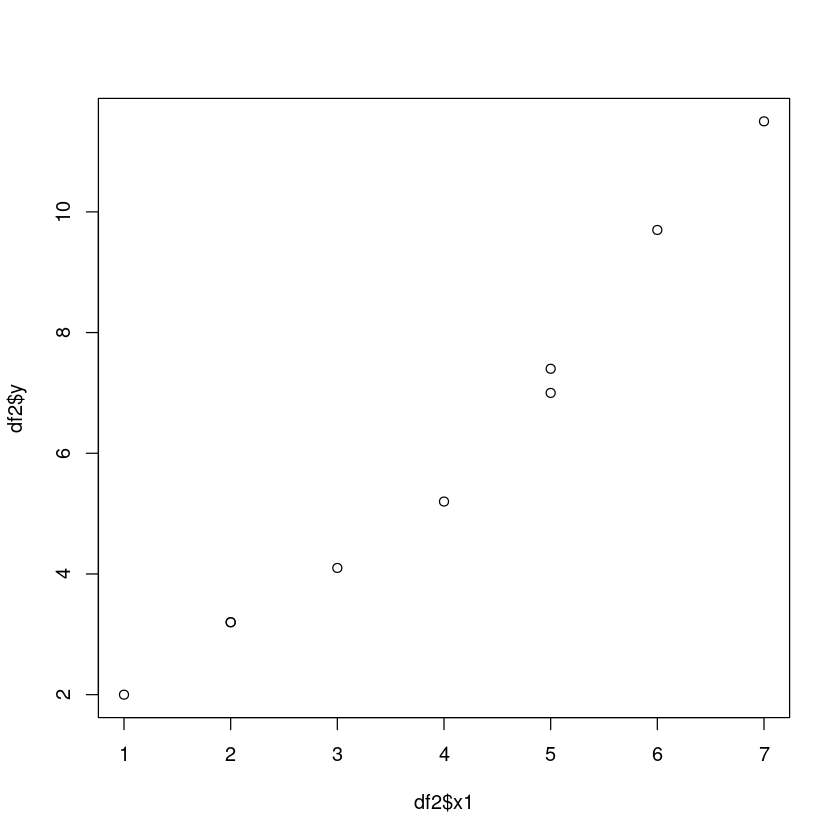

In [110]:
plot(df2$x1,df2$y)

산점도를 그려보면 $x = 4$를 기준으로 기울기가 달라지는 것으로 보인다.

### (2)

위의 (1)에서 얻은 점을 경계로 구간별 단순선형회귀선을 추정하시오. 사용되는 모형은
$$x_{2i} = \begin{cases} 1 :& \text{만약 }x_{1i} > x_w \text{ 이면 }\\ 0 : &\text{만약 } x_{1i} \le x_w \text{ 이면 } \end{cases}$$
과 같다.

**answer**

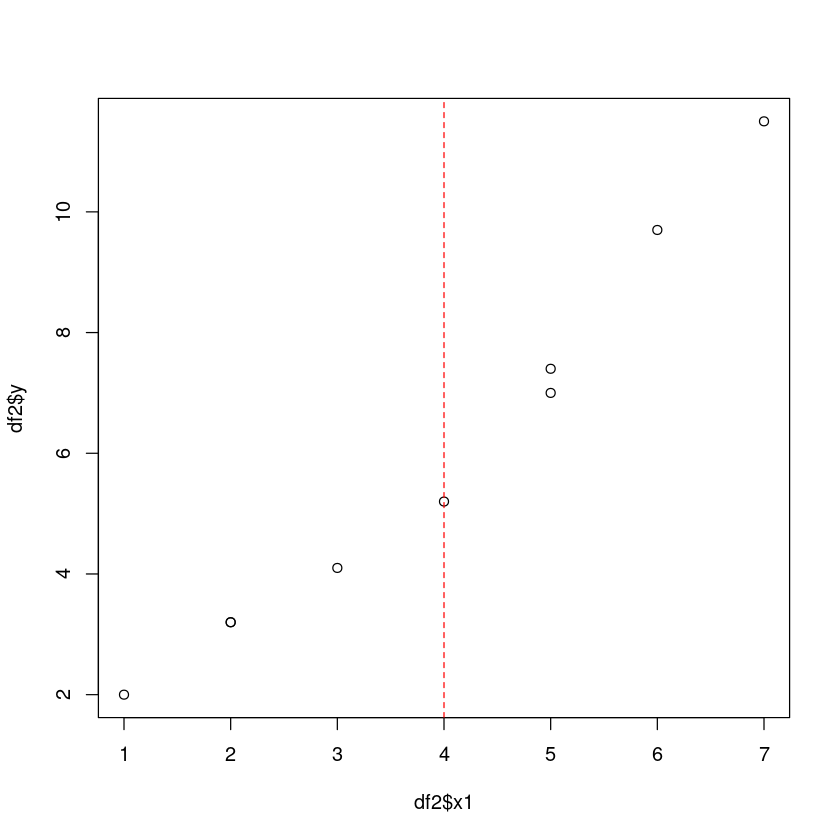

In [111]:
plot(df2$x1,df2$y)
abline(v=4,col="red",lty=2)

In [112]:
df2$x2 <- sapply(df2$x1, function(x) max(0, x-4))

In [113]:
x_sp <- matrix(c(rep(1,9),df2$x1,df2$x2),nrow=9,ncol=3)

In [114]:
x_sp

1,1,0
1,2,0
1,2,0
1,3,0
1,4,0
1,5,1
1,5,1
1,6,2
1,7,3


In [115]:
betahat_sp <- solve(t(x_sp)%*%x_sp)%*%t(x_sp)%*%df2$y
betahat_sp

1.071429
1.023469
1.119388


---

R code

In [116]:
model_1 <- lm(y ~ x1+x2, df2)

In [117]:
summary(model_1)


Call:
lm(formula = y ~ x1 + x2, data = df2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30816 -0.09388  0.03469  0.08163  0.24898 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.07143    0.19695   5.440 0.001602 ** 
x1           1.02347    0.06973  14.677 6.28e-06 ***
x2           1.11939    0.12937   8.652 0.000131 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1823 on 6 degrees of freedom
Multiple R-squared:  0.9976,	Adjusted R-squared:  0.9968 
F-statistic:  1242 on 2 and 6 DF,  p-value: 1.4e-08


In [118]:
df2_2 <- rbind(df2[,2:3], c(4,0))

In [119]:
df2_2$y <- predict(model_1, newdata = df2_2)

**this is the predicted line of multiple linear regression**

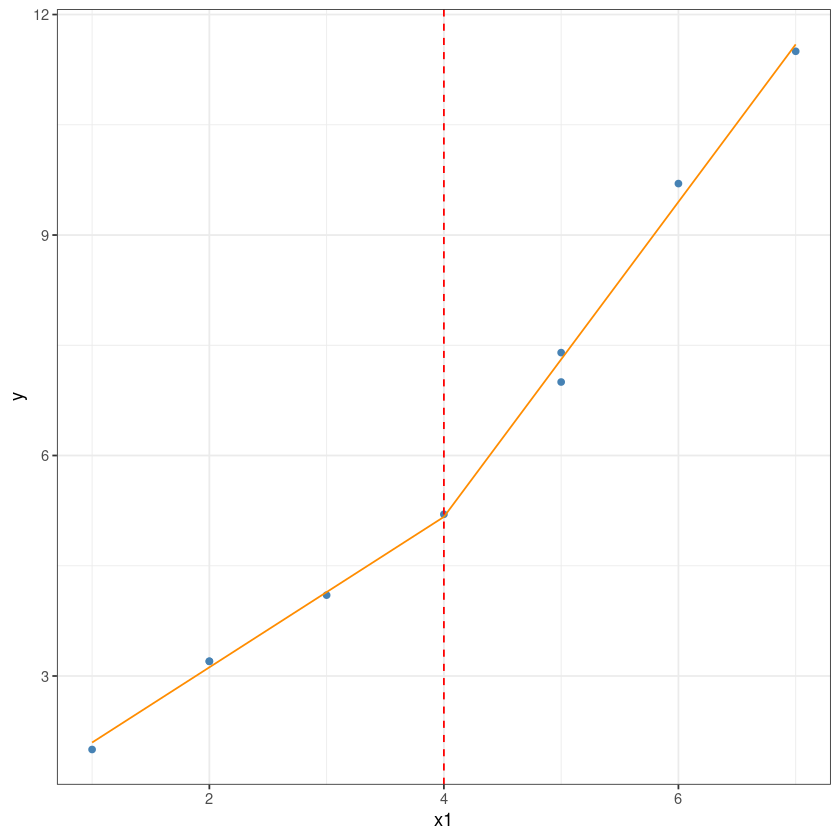

In [120]:
ggplot(data = df2, aes(x = x1, y = y)) + 
  geom_point(color='steelblue') +
  geom_line(color='darkorange',data = df2_2, aes(x=x1, y=y))+
  geom_vline(xintercept = 4, lty=2, col='red')+
  theme_bw()

### (3)

위의 (2)에 있는 모형에서 $\beta_2$ 의 90% 신뢰구간을 구하고, 그 의미를 해석하시오.

**answer**

In [121]:
t(x_sp)%*%x_sp

9,35,7
35,169,43
7,43,15


In [122]:
solve(t(x_sp)%*%x_sp)

1.1666667,-0.3809524,0.5476190
-0.3809524,0.1462585,-0.2414966
0.5476190,-0.2414966,0.5034014


$(x^\top x)^{-1}_{(3,3)}$

In [123]:
solve(t(x_sp)%*%x_sp)[3,3]

[1] 0.5034014

$MSE \sim \sigma^2$

In [124]:
SSE_sp <- sum((df2$y - x_sp%*%betahat_sp)**2)
SSE_sp

[1] 0.1994898

In [125]:
MSE_sp <- SSE_sp/(9-2-1)
MSE_sp

[1] 0.0332483

$var(\beta_2) = (x^\top x)^{-1}_{(3,3)} \sigma^2$

In [126]:
hat_var_b2_sp <- solve(t(x_sp)%*%x_sp)[3,3] * MSE_sp
hat_var_b2_sp

[1] 0.01673724

In [127]:
sqrt(hat_var_b2_sp)

[1] 0.1293725

$\beta_2 \pm t_{0.95}(6) se(\hat{\beta}_2)$

In [128]:
betahat_sp[3] - qt(0.95,6) * sqrt(hat_var_b2_sp)

[1] 0.8679937

In [129]:
betahat_sp[3] + qt(0.95,6) * sqrt(hat_var_b2_sp)

[1] 1.370782

$\beta_2$는 기울기의 차이이다.

90% 시뢰구긴이 0을 포함하지 않고 모두 양수이므로, $\beta_2 \neq 0$이라고 90% 확신할 수 있다.

즉 구간별 회귀직선의 기울기는 다르다고 할 수 있다.(유의수준 0.1)

---

R code

In [130]:
summary(model_1)


Call:
lm(formula = y ~ x1 + x2, data = df2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30816 -0.09388  0.03469  0.08163  0.24898 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.07143    0.19695   5.440 0.001602 ** 
x1           1.02347    0.06973  14.677 6.28e-06 ***
x2           1.11939    0.12937   8.652 0.000131 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1823 on 6 degrees of freedom
Multiple R-squared:  0.9976,	Adjusted R-squared:  0.9968 
F-statistic:  1242 on 2 and 6 DF,  p-value: 1.4e-08


In [131]:
anova(model_1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x1,1,80.0869407,80.0869407,2408.75300,4.798337e-09
x2,1,2.4891251,2.4891251,74.86473,1.313702e-04
Residuals,6,0.1994898,0.0332483,NA,NA


In [132]:
confint(model_1, level=0.90)

,5 %,95 %
(Intercept),0.6887173,1.454140
x1,0.8879634,1.158975
x2,0.8679937,1.370782
